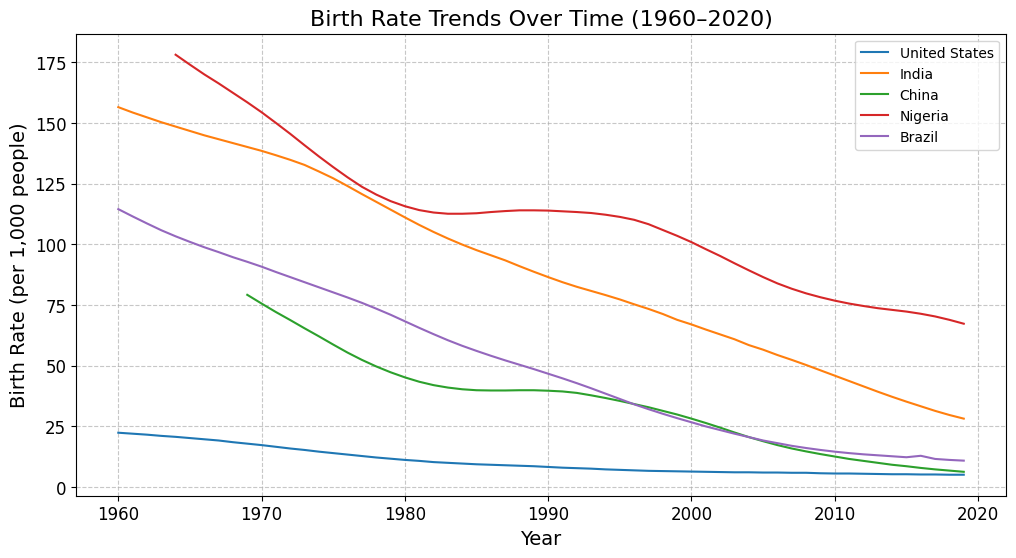

Graph saved to: C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs\birth_rate_trends.png


In [ ]:
# Question 1: How does the birth rate change over time, and what are the key patterns in these changes?
# I need to import necessary libraries for Question 1
import pandas as pd
import matplotlib.pyplot as plt
import os

# This is my file paths where my data and graphs are at
data_path = r"C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\data"
graphs_path = r"C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs"

# This is where I use to load my data up
file_name = "who-birth-rate.csv"
birth_rate_file = os.path.join(data_path, file_name)
birth_rate_data = pd.read_csv(birth_rate_file, skiprows=4)

# I need to clean and process the data
birth_rate_data = birth_rate_data.drop(columns=["Unnamed: 65"], errors="ignore")  
birth_rate_data = birth_rate_data.set_index("Country Name")  

# I select relevant columns (years)
years = [str(year) for year in range(1960, 2021)]
birth_rate_over_time = birth_rate_data[years].transpose()  

# I need to ensure the index (years) is numeric for proper plotting
birth_rate_over_time.index = birth_rate_over_time.index.astype(int)

# I have to plot the data for a few example countries
example_countries = ["United States", "India", "China", "Nigeria", "Brazil"]
plt.figure(figsize=(12, 6))
for country in example_countries:
    if country in birth_rate_over_time.columns:
        plt.plot(birth_rate_over_time.index, birth_rate_over_time[country], label=country)

# I can be able to customize the plot
plt.title("Birth Rate Trends Over Time (1960–2020)", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Birth Rate (per 1,000 people)", fontsize=14)
plt.legend(fontsize=10)
plt.grid(True, linestyle="--", alpha=0.7)

# I have to adjust x-axis ticks for better spacing
plt.xticks(ticks=range(1960, 2021, 10), fontsize=12)  # Show every 10th year
plt.yticks(fontsize=12)

# I save the graph to the specified folder I want to save it as
graph_file = os.path.join(graphs_path, "birth_rate_trends.png")
plt.savefig(graph_file, dpi=300)
plt.show()

print(f"Graph saved to: {graph_file}")








Correlation Matrix:
                                         Birth Rate  GDP (current US$)  \
Birth Rate                                 1.000000          -0.197240   
GDP (current US$)                         -0.197240           1.000000   
Inflation, GDP deflator (annual %)         0.012285          -0.012423   
Life expectancy at birth, total (years)   -0.895287           0.176933   

                                         Inflation, GDP deflator (annual %)  \
Birth Rate                                                         0.012285   
GDP (current US$)                                                 -0.012423   
Inflation, GDP deflator (annual %)                                 1.000000   
Life expectancy at birth, total (years)                           -0.025237   

                                         Life expectancy at birth, total (years)  
Birth Rate                                                             -0.895287  
GDP (current US$)                              

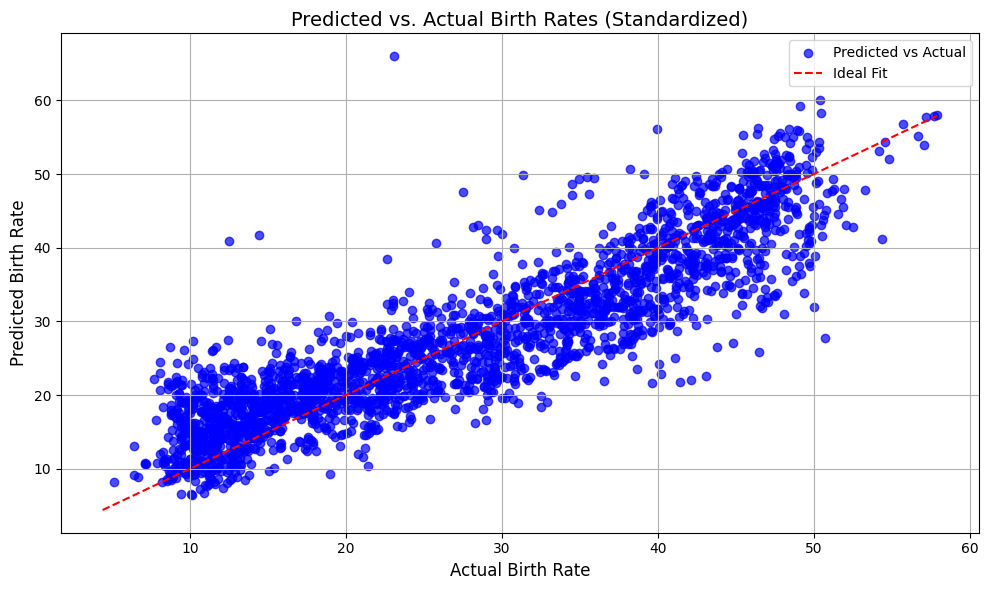

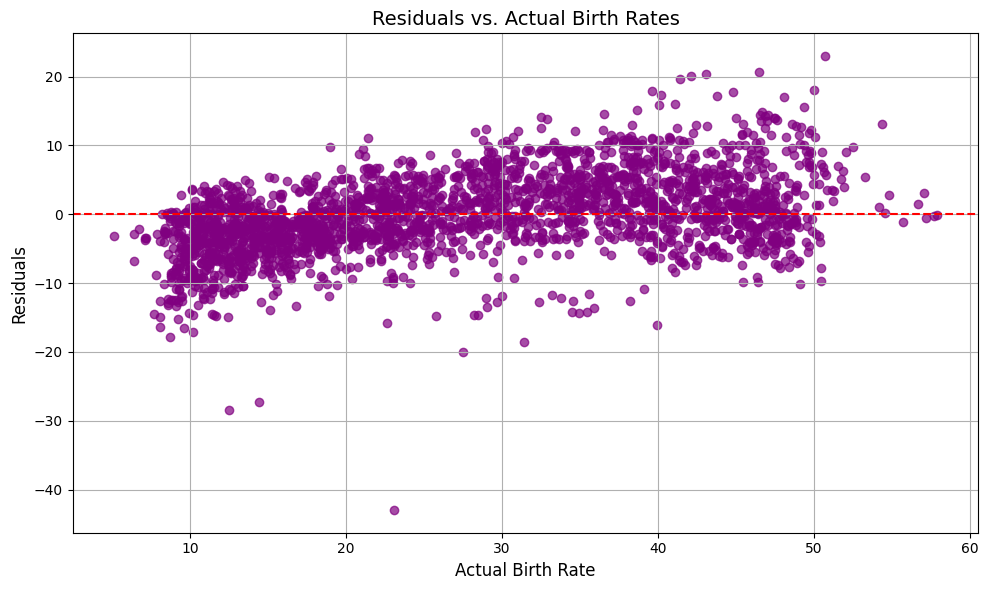

Graph saved to: C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs\predicted_vs_actual_birth_rate_standardized.png
Residual Plot saved to: C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs\residuals_vs_actual_birth_rate.png


In [ ]:
# Question 2: What role do economic factors play in birth rate trends over time? 
# We need to import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import os

# This is my file paths where my data and graphs are at
data_path = r"C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\data"
graphs_path = r"C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs"

# This is where I use to load my data up
birth_rate_file = "world_bank_birth_rate.csv"
economic_factors_file = "economic_factors.csv"

birth_rate_data = pd.read_csv(f"{data_path}\\{birth_rate_file}")
economic_factors_data = pd.read_csv(f"{data_path}\\{economic_factors_file}")

# I have to melt economic_factors_data to reshape year columns into rows
economic_factors_data_melted = economic_factors_data.melt(
    id_vars=["Country Name", "Country Code", "Series Name", "Series Code"],
    var_name="Year",
    value_name="Value"
)

# I have to clean the Year column to remove extra text
economic_factors_data_melted["Year"] = economic_factors_data_melted["Year"].str.extract(r"(\d{4})").astype(int)

# I have to convert the Value column to numeric, replacing non-numeric entries with NaN
economic_factors_data_melted["Value"] = pd.to_numeric(economic_factors_data_melted["Value"], errors="coerce")

# I have to drop rows with NaN in the Value column
economic_factors_data_melted = economic_factors_data_melted.dropna(subset=["Value"])

# I can filter for specific economic indicators (e.g., GDP, Inflation, Life Expectancy)
economic_indicators = ["GDP (current US$)", "Inflation, GDP deflator (annual %)", "Life expectancy at birth, total (years)"]
economic_factors_filtered = economic_factors_data_melted[
    economic_factors_data_melted["Series Name"].isin(economic_indicators)
]

# I have to pivot to create columns for each indicator
economic_factors_pivot = economic_factors_filtered.pivot_table(
    index=["Country Name", "Year"],
    columns="Series Name",
    values="Value"
).reset_index()

# I can merge with birth_rate_data
merged_data = pd.merge(
    birth_rate_data,
    economic_factors_pivot,
    on=["Country Name", "Year"],
    how="inner"
)

# I have to select relevant columns for regression
selected_columns = ["Value", "GDP (current US$)", "Inflation, GDP deflator (annual %)", "Life expectancy at birth, total (years)"]
regression_data = merged_data[selected_columns].dropna()

# I have to rename columns for clarity
regression_data.rename(columns={"Value": "Birth Rate"}, inplace=True)

# I have to do Correlation check
print("Correlation Matrix:")
print(regression_data.corr())

# I have to do separate predictors (X) and target variable (y)
X = regression_data[["GDP (current US$)", "Inflation, GDP deflator (annual %)", "Life expectancy at birth, total (years)"]]
y = regression_data["Birth Rate"]

# I have to standardize the predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# I have to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# I need to do the train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# I have to do predict on the test set
y_pred = model.predict(X_test)

# I have to evaluate on the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# I have to visualize the predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="b", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.title("Predicted vs. Actual Birth Rates (Standardized)", fontsize=14)
plt.xlabel("Actual Birth Rate", fontsize=12)
plt.ylabel("Predicted Birth Rate", fontsize=12)
plt.legend(fontsize=10)
plt.grid()
plt.tight_layout()

# I can save the graph in my graph path
graph_file = f"{graphs_path}\\predicted_vs_actual_birth_rate_standardized.png"
plt.savefig(graph_file, dpi=300)
plt.show()

# This is my Residuals visualization
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals, alpha=0.7, color="purple")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs. Actual Birth Rates", fontsize=14)
plt.xlabel("Actual Birth Rate", fontsize=12)
plt.ylabel("Residuals", fontsize=12)
plt.grid()
plt.tight_layout()

# I can save residual plot onto my graph path
residual_graph_file = f"{graphs_path}\\residuals_vs_actual_birth_rate.png"
plt.savefig(residual_graph_file, dpi=300)
plt.show()

print(f"Graph saved to: {graph_file}")
print(f"Residual Plot saved to: {residual_graph_file}")


Columns in cost_of_living_data:
Index(['Unnamed: 0', 'Saint Petersburg, Russia', 'Istanbul, Turkey',
       'Izmir, Turkey', 'Helsinki, Finland', 'Chisinau, Moldova',
       'Milan, Italy', 'Cairo, Egypt', 'Banja Luka, Bosnia And Herzegovina',
       'Baku, Azerbaijan',
       ...
       'Lviv, Ukraine', 'Novosibirsk, Russia', 'Bursa, Turkey',
       'Brussels, Belgium', 'Jerusalem, Israel', 'Melbourne, Australia',
       'Perth, Australia', 'Sydney, Australia', 'Alexandria, Egypt',
       'Quito, Ecuador'],
      dtype='object', length=161)

Sample rows in cost_of_living_data:
                                          Unnamed: 0  \
0                       Meal, Inexpensive Restaurant   
1  Meal for 2 People, Mid-range Restaurant, Three...   
2     McMeal at McDonalds (or Equivalent Combo Meal)   
3                  Domestic Beer (0.5 liter draught)   
4                  Imported Beer (0.33 liter bottle)   

   Saint Petersburg, Russia  Istanbul, Turkey  Izmir, Turkey  \
0             

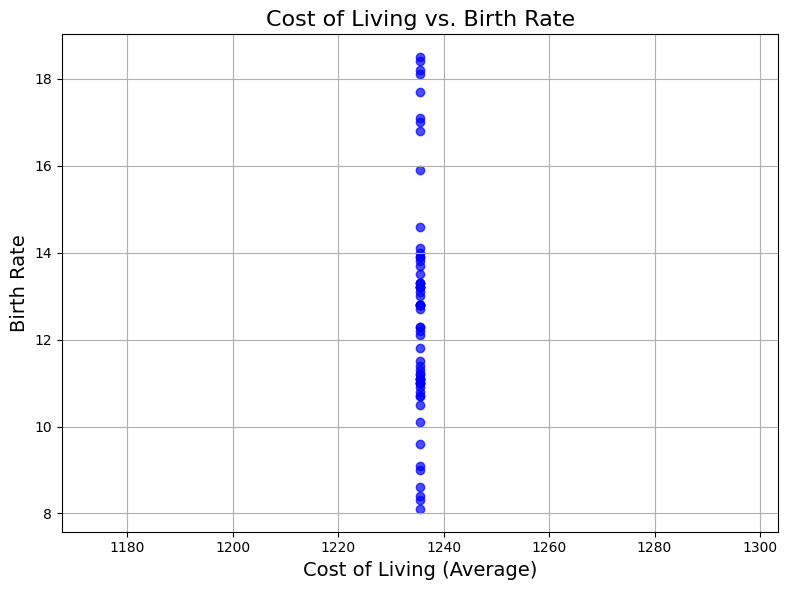


Model Evaluation:
Mean Squared Error (MSE): 11.27
R-squared (R2): -0.05


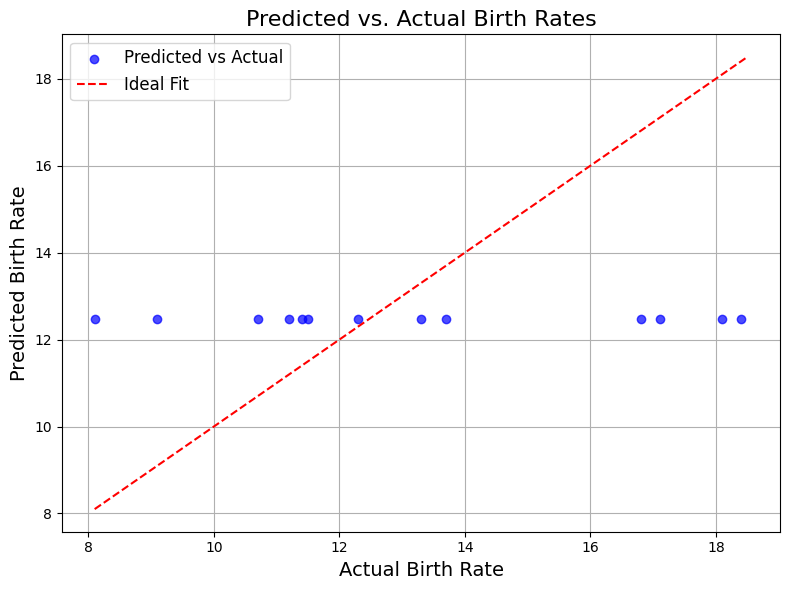

Scatter Plot saved to: C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs\cost_of_living_vs_birth_rate.png
Regression Prediction Plot saved to: C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs\predicted_vs_actual_cost_of_living.png


In [ ]:
# Question 3: How are cost of living different in other countries that affects the birth rate to either go either up or down?
# I have to import necessary libraries for question 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import os

# This is my file paths for it to get my data and port over my graph data
data_path = r"C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\data"
graphs_path = r"C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs"

# I have to load up my datasets
birth_rate_file = "world_bank_birth_rate.csv"
cost_of_living_file = "cost-of-living.csv"

birth_rate_data = pd.read_csv(f"{data_path}\\{birth_rate_file}")
cost_of_living_data = pd.read_csv(f"{data_path}\\{cost_of_living_file}")

# I have to debugging for it to print the structure of cost_of_living_data
print("Columns in cost_of_living_data:")
print(cost_of_living_data.columns)

print("\nSample rows in cost_of_living_data:")
print(cost_of_living_data.head())

# I have to focus on specific cities/countries to get the right data
# For simplicity, I can filter cost_of_living_data for a few columns that represent countries
selected_cities = ['Saint Petersburg, Russia', 'Istanbul, Turkey', 'Helsinki, Finland']
filtered_cost_of_living = cost_of_living_data[['Unnamed: 0'] + selected_cities]

# I have to melt the data to reshape it for analysis
cost_of_living_melted = filtered_cost_of_living.melt(
    id_vars=['Unnamed: 0'], 
    var_name='City', 
    value_name='Cost of Living'
)

# I can map cities to countries
cost_of_living_melted['Country'] = cost_of_living_melted['City'].apply(lambda x: x.split(', ')[-1])

# I can aggregate cost-of-living data by country (average across cities)
cost_of_living_by_country = cost_of_living_melted.groupby('Country')['Cost of Living'].mean().reset_index()

# I have to merge with birth_rate_data
birth_rate_column = "Country Name"  # Ensure this matches your dataset
merged_data = pd.merge(
    birth_rate_data,
    cost_of_living_by_country,
    left_on=birth_rate_column,
    right_on='Country',
    how='inner'
)

# I can select relevant columns for analysis
columns_of_interest = ['Value', 'Cost of Living']
regression_data = merged_data[columns_of_interest].dropna()

# I have to Rename columns for clarity
regression_data.rename(columns={"Value": "Birth Rate"}, inplace=True)

# I have to do Correlation check for it to work
print("\nCorrelation Matrix:")
print(regression_data.corr())

# I have to Scatter plot of cost of living vs birth rate for it to get the data
plt.figure(figsize=(8, 6))
plt.scatter(regression_data['Cost of Living'], regression_data['Birth Rate'], alpha=0.7, color='b')
plt.title("Cost of Living vs. Birth Rate", fontsize=16)
plt.xlabel("Cost of Living (Average)", fontsize=14)
plt.ylabel("Birth Rate", fontsize=14)
plt.grid()
plt.tight_layout()

#  I can Save the scatter plot onto the graph path
scatter_graph_file = f"{graphs_path}\\cost_of_living_vs_birth_rate.png"
plt.savefig(scatter_graph_file, dpi=300)
plt.show()

# Now, I have prepare data for regression analysis
X = regression_data[['Cost of Living']]
y = regression_data['Birth Rate']

# I have to standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# I need to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# I need to train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# I have to predict on the test set
y_pred = model.predict(X_test)

# I need to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# I have to visualize predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b', label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', label='Ideal Fit')
plt.title("Predicted vs. Actual Birth Rates", fontsize=16)
plt.xlabel("Actual Birth Rate", fontsize=14)
plt.ylabel("Predicted Birth Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()

# I can Save the scatter plot data onto my graph path
regression_graph_file = f"{graphs_path}\\predicted_vs_actual_cost_of_living.png"
plt.savefig(regression_graph_file, dpi=300)
plt.show()

print(f"Scatter Plot saved to: {scatter_graph_file}")
print(f"Regression Prediction Plot saved to: {regression_graph_file}")



Columns in birth_rate_data:
Index(['Indicator Name', 'Indicator Code', 'Country Name', 'Country Code',
       'Year', 'Value', 'Disaggregation'],
      dtype='object')

Columns in covid_data:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', '

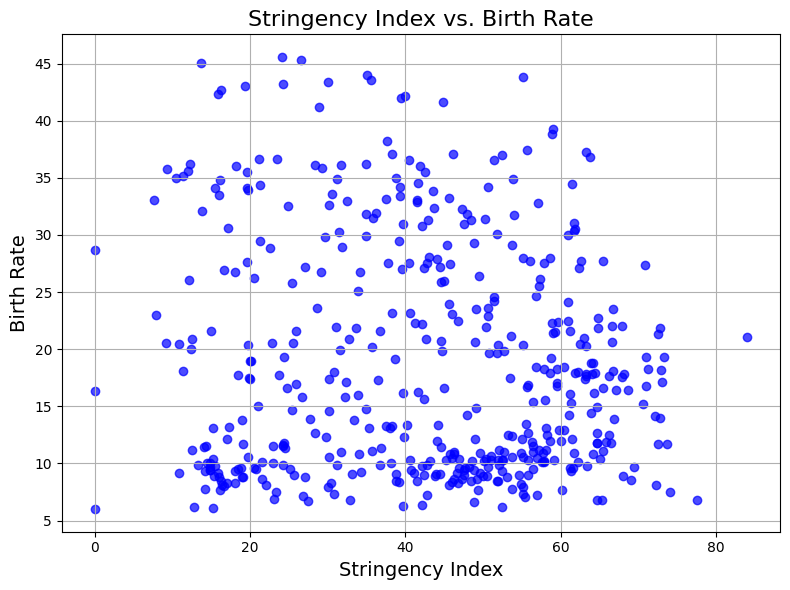


Model Evaluation:
Mean Squared Error (MSE): 96.67
R-squared (R2): 0.03


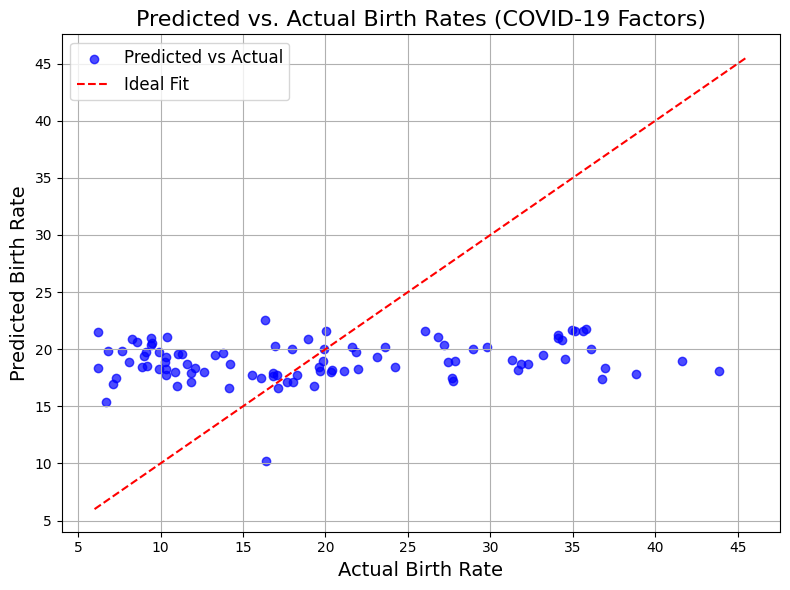

Scatter Plot saved to: C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs\stringency_index_vs_birth_rate.png
Regression Prediction Plot saved to: C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs\predicted_vs_actual_covid_factors.png


In [ ]:
# Question 4: What influence do Covid 19 crises have an impact on birth rates? 
# I have to import necessary libraries for question 4
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import os

# This is my file paths for my data and graphs 
data_path = r"C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\data"
graphs_path = r"C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\graphs"

# I have to load the datasets
birth_rate_file = "world_bank_birth_rate.csv"
covid_data_file = "owid-covid-data.csv"

birth_rate_data = pd.read_csv(f"{data_path}\\{birth_rate_file}")
covid_data = pd.read_csv(f"{data_path}\\{covid_data_file}")

# I have to do debugging to check the structure of the datasets
print("Columns in birth_rate_data:")
print(birth_rate_data.columns)

print("\nColumns in covid_data:")
print(covid_data.columns)

# I have to rename 'Year' column in birth_rate_data to 'year'
birth_rate_data.rename(columns={"Year": "year"}, inplace=True)

# I have to filter relevant columns from COVID-19 data
numeric_columns = ["total_cases", "total_deaths", "stringency_index"]  # Numeric columns for analysis
covid_data_filtered = covid_data[["location", "date"] + numeric_columns].dropna()

# I have to convert the 'date' column to datetime and extract the year
covid_data_filtered["year"] = pd.to_datetime(covid_data_filtered["date"]).dt.year

# I have to convert necessary columns to numeric (if they are not already)
for col in numeric_columns:
    covid_data_filtered[col] = pd.to_numeric(covid_data_filtered[col], errors="coerce")

# I can aggregate COVID-19 data by country and year
covid_data_aggregated = covid_data_filtered.groupby(["location", "year"])[numeric_columns].mean().reset_index()

# I have to rename columns for clarity
covid_data_aggregated.rename(columns={
    "location": "Country Name",
    "total_cases": "Total Cases",
    "total_deaths": "Total Deaths",
    "stringency_index": "Stringency Index"
}, inplace=True)

# I have to do debugging to Check aggregated COVID-19 data
print("\nAggregated COVID-19 data:")
print(covid_data_aggregated.head())

# I have to merge birth rate data with COVID-19 data
merged_data = pd.merge(
    birth_rate_data,
    covid_data_aggregated,
    on=["Country Name", "year"],
    how="inner"
)

# I have to do debugging to check merged data
print("\nMerged Data:")
print(merged_data.head())

# I have to select relevant columns for analysis
columns_of_interest = ["Value", "Total Cases", "Total Deaths", "Stringency Index"]
regression_data = merged_data[columns_of_interest].dropna()

# I have to rename columns for clarity
regression_data.rename(columns={"Value": "Birth Rate"}, inplace=True)

# I have to do Correlation Check
print("\nCorrelation Matrix:")
print(regression_data.corr())

# I have to do Scatter plot of stringency index vs. birth rate to get my data
plt.figure(figsize=(8, 6))
plt.scatter(regression_data["Stringency Index"], regression_data["Birth Rate"], alpha=0.7, color="b")
plt.title("Stringency Index vs. Birth Rate", fontsize=16)
plt.xlabel("Stringency Index", fontsize=14)
plt.ylabel("Birth Rate", fontsize=14)
plt.grid()
plt.tight_layout()

# I can save the scatter plot onto my graph path.
scatter_graph_file = f"{graphs_path}\\stringency_index_vs_birth_rate.png"
plt.savefig(scatter_graph_file, dpi=300)
plt.show()

# I have to prepare data for regression analysis
X = regression_data[["Total Cases", "Total Deaths", "Stringency Index"]]
y = regression_data["Birth Rate"]

# I have to standardize predictors
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# I need to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# I need to train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# I have to predict on the test set
y_pred = model.predict(X_test)

# I need to evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# I need to visualize predicted vs. actual values to get my data
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color="b", label="Predicted vs Actual")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.title("Predicted vs. Actual Birth Rates (COVID-19 Factors)", fontsize=16)
plt.xlabel("Actual Birth Rate", fontsize=14)
plt.ylabel("Predicted Birth Rate", fontsize=14)
plt.legend(fontsize=12)
plt.grid()
plt.tight_layout()

# I have to save the scatter plot onto my graph path
regression_graph_file = f"{graphs_path}\\predicted_vs_actual_covid_factors.png"
plt.savefig(regression_graph_file, dpi=300)
plt.show()

print(f"Scatter Plot saved to: {scatter_graph_file}")
print(f"Regression Prediction Plot saved to: {regression_graph_file}")


Merged Data Size: (3, 4)
   Country  year  Birth Rate  Households with Children
0  Austria  2011       9.300                 23.135120
1  Belgium  2011      11.700                 24.796085
2    Chile  2011      14.109                 26.357066
Mean Squared Error (MSE): 0.00
R-squared (R2): 1.00


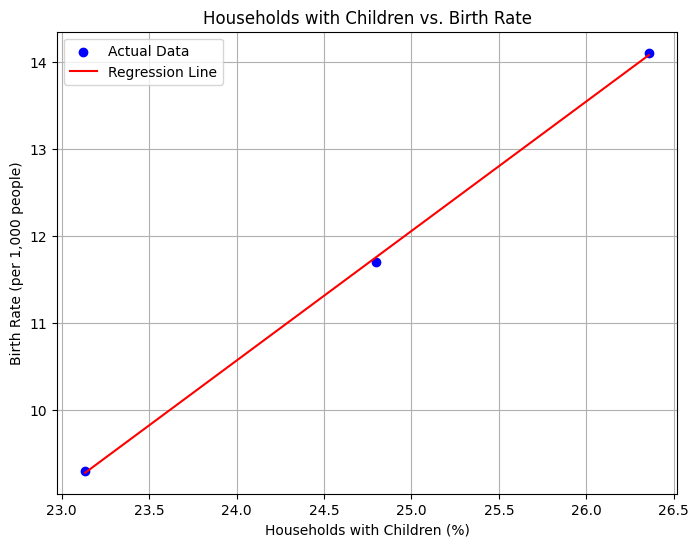

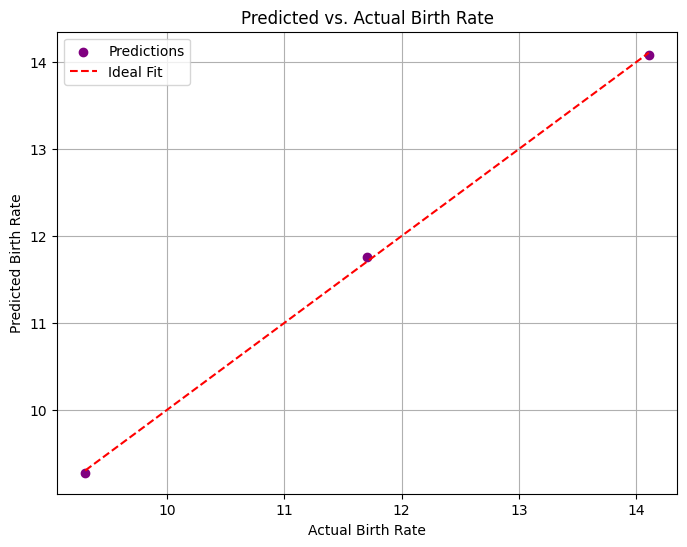

Merged Data Size: (3, 4)
   Country  year  Birth Rate  Households with Children
0  Austria  2011       9.300                 23.135120
1  Belgium  2011      11.700                 24.796085
2    Chile  2011      14.109                 26.357066


In [ ]:
# Question 5: How do family norms influence birth rates?
# I need to import my libraries for Question 5
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# I need to load up datasets
data_path = r"C:\Users\Hamza Yousuf\Desktop\Data Science Individual Project\data"
birth_rate_file = "world_bank_birth_rate.csv"
family_norms_file = "family_norms.csv"

birth_rate_data = pd.read_csv(f"{data_path}\\{birth_rate_file}")
family_norms_data = pd.read_csv(f"{data_path}\\{family_norms_file}")

# I need to clean and prepare birth rate data
birth_rate_data.rename(columns={"Year": "year", "Country Name": "Country"}, inplace=True)
birth_rate_data = birth_rate_data[["Country", "year", "Value"]]

# I also have to clean and prepare family norms data
family_norms_data.rename(columns={"Year": "year", "CoupleHouseholdsWithChildren": "Households with Children"}, inplace=True)
family_norms_data["Households with Children"] = family_norms_data["Households with Children"].replace("..", np.nan)
family_norms_data["Households with Children"] = family_norms_data["Households with Children"].astype(float)
family_norms_data["Households with Children"] = family_norms_data["Households with Children"].fillna(family_norms_data["Households with Children"].mean())

# I have to merge datasets
merged_data = pd.merge(
    birth_rate_data,
    family_norms_data,
    on=["Country", "year"],
    how="inner"
)

# I have to rename columns for clarity
merged_data.rename(columns={"Value": "Birth Rate"}, inplace=True)

# I have to do debugging to inspect merged data
print("Merged Data Size:", merged_data.shape)
print(merged_data.head())

# I have to do linear regression analysis
X = merged_data[["Households with Children"]]
y = merged_data["Birth Rate"]

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)

# We need to evaluate the model
mse = mean_squared_error(y, predictions)
r2 = r2_score(y, predictions)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

# This is my first plot: Plot 1: Scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, predictions, color="red", label="Regression Line")
plt.title("Households with Children vs. Birth Rate")
plt.xlabel("Households with Children (%)")
plt.ylabel("Birth Rate (per 1,000 people)")
plt.legend()
plt.grid(True)
plt.savefig(f"{data_path}\\households_with_children_vs_birth_rate.png")
plt.show()

# This is my second plot: 0265Plot 2: Predicted vs. Actual
plt.figure(figsize=(8, 6))
plt.scatter(y, predictions, color="purple", label="Predictions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", linestyle="--", label="Ideal Fit")
plt.title("Predicted vs. Actual Birth Rate")
plt.xlabel("Actual Birth Rate")
plt.ylabel("Predicted Birth Rate")
plt.legend()
plt.grid(True)
plt.savefig(f"{data_path}\\predicted_vs_actual_family_norms.png")
plt.show()

print("Merged Data Size:", merged_data.shape)
print(merged_data)
